# Machine Learning Fundamentals

- Model Evaluation
- Data Preprocessing
- Feature Engineering
- Overfitting

### Branches of Machine Learning

#### Supervised Learning
It consists of learning to map input data to known targets (also called *annotations*).
> Optical character recognition<br/>
> Speech recognition<br/>
> Image classification<br/>
> Language translation

Few Exotic Variants are:
 - **Sequence generation—** Given a picture, predict a caption describing it. Sequence generation can sometimes be reformulated as a series of classification problems (such as repeatedly predicting a word or token in a sequence).
 - **Syntax tree prediction—** Given a sentence, predict its decomposition into a syntax tree.
 - **Object detection—** Given a picture, draw a bounding box around certain objects inside the picture. This can also be expressed as a classification problem (given many candidate bounding boxes, classify the contents of each one) or as a joint classification and regression problem, where the bounding-box coordinates are predicted via vector regression.
 - **Image segmentation—** Given a picture, draw a pixel-level mask on a specific object.
 
#### Unsupervised Learning
This branch of machine learning consists of finding interesting transformations of the input data without the help of any targets, for the purposes of data visualization, data compression, or data denoising, or to better understand the correlations present in the data at hand. It’s often a necessary step in better understanding a dataset before attempting to solve a supervised-learning problem. ```Dimensionality reduction``` and ```clustering``` are well-known categories of unsupervised learning.

#### Self-Supervised Learning
Self-supervised learning is supervised learning without human-annotated labels. There are still labels involved (because the learning has to be supervised by something), but they’re generated from the input data, typically using a heuristic algorithm.

For instance, *autoencoders* are a well-known instance of self-supervised learning, where the generated targets are the input, unmodified. In the same way, trying to predict the next frame in a video, given past frames, or the next word in a text, given previous words, are instances of self-supervised learning (temporally supervised learning, in this case: supervision comes from future input data). Note that the distinction between supervised, self-supervised, and unsupervised learning can be blurry sometimes—these categories are more of a continuum without solid borders. Self-supervised learning can be reinterpreted as either supervised or unsupervised learning, depending on whether we pay attention to the learning mechanism or to the context of its application.

#### Reinforcement Learning
In reinforcement learning, an *agent* receives information about its environment and learns to choose actions that will maximize some reward. For instance, a neural network that “looks” at a videogame screen and outputs game actions in order to maximize its score can be trained via reinforcement learning.

#### Classification & Regression Glossary
 - **Sample or input—** One data point that goes into model.
 - **Prediction or output—** What comes out of model.
 - **Target—** The truth. The value that the model should ideally have predicted, according to an external source of data.
 - **Prediction error or loss value—** A measure of the distance between model’s prediction and the target.
 - **Classes—** A set of possible labels to choose from in a classification problem. For example, when classifying cat and dog pictures, “dog” and “cat” are the two classes.
 - **Label—** A specific instance of a class annotation in a classification problem. For instance, if picture #1234 is annotated as containing the class “dog,” then “dog” is a label of picture #1234.
 - **Ground-truth or annotations—** All targets for a dataset, typically collected by humans.
 - **Binary classification—** A classification task where each input sample should be categorized into two exclusive categories.
 - **Multiclass classification—** A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.
 - **Multilabel classification—** A classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the “cat” label and the “dog” label. The number of labels per image is usually variable.
 - **Scalar regression—** A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
 - **Vector regression—** A task where the target is a set of continuous values: for example, a continuous vector. A regression against multiple values (such as the coordinates of a bounding box in an image) is a *vector regression*.
 - **Mini-batch or batch—** A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.
 

#### Evaluate Machine Learning Models
We split the data into a training set, a validation set, and a test set. The reason not to evaluate the models on the same data
they were trained on quickly became evident: after just a few epochs, all three models began to ```overfit```. That is, their performance on never-before-seen data started stalling (or worsening) compared to their performance on the training data, which always improves as training progresses. 

In machine learning, the goal is to achieve models that generalize—that perform well on never-before-seen data—and overfitting is the central obstacle. We can only control that which we can observe, so it’s crucial to be able to reliably measure the
**generalization power** of the model.

#### Training, Validation and Test Sets

Evaluating a model always boils down to splitting the available data into three sets: **training**, **validation**, and **test**. Train on the training data and evaluate the model on the validation data. Once the model is ready for prime time, test it one final time on the test data.

A model always involves tuning its configuration: for example, choosing the number of layers or the size of the layers (called the *hyperparameters* of the model, to distinguish them from the parameters, which are the network’s weights). We do this tuning by using as a feedback signal the performance of the model on the validation data. In essence, this tuning is a form of *learning*: a search for a good configuration in some parameter space. As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in *overfitting to the validation set*, even though our model is never directly trained on it.

Central to this phenomenon is the notion of *information leaks*. Every time we tune a hyperparameter of our model based on the model’s performance on the validation set, some information about the validation data leaks into the model. If we do this
only once, for one parameter, then very few bits of information will leak, and your validation set will remain reliable to evaluate the model. But if we repeat this many times—running one experiment, evaluating on the validation set, and modifying our
model as a result—then we’ll leak an increasingly significant amount of information about the validation set into the model.

We’ll end up with a model that performs artificially well on the validation data, because that’s what we optimized it for. We care about performance on completely new data, not the validation data, so We need to use a completely different, never-before-seen dataset to evaluate the model: the test dataset. Our model shouldn’t have had access to any information about the test set, even indirectly. If anything about the model has been tuned based on test set performance, then our measure of generalization will be flawed.

#### SIMPLE HOLD-OUT VALIDATION
Set apart some fraction of data as test set. Train on the remaining data, and evaluate on the test set. In order to prevent information leaks, we shouldn’t tune our model based on the test set, and therefore we should also reserve a validation set

![capture](https://user-images.githubusercontent.com/13174586/49629047-763c9200-fa0d-11e8-897c-d03463632f5b.JPG)


#### Hold-Out Validation

In [ ]:
num_validation_samples= 10000

np.random.shuffle(data)

validation_data= data[:num_validation_samples]
data= data[num_validation_samples:]

training_data= data[:]

model= get_model()
model.train(training_data)

validation_score= model.evaluate(validation_data)

#Once hyperparameters are tuned, it’s common to train final model from scratch on all non-test data available.
model=get_model()
model.train(np.concatenate([training_data, validation_data]))

test_Score= model.evaluate(test_data)

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is available, then our validation and test sets may contain too few samples to be statistically representative of the data at hand. This is easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then we’re having this issue.

#### K-FOLD CROSS VALIDATION
With this approach, we split your data into *K* partitions of equal size. For each partition *i*, train a model on the remaining *K – 1* partitions, and evaluate it on partition i. Our final score is then the averages of the *K* scores obtained. This method is helpful when the performance of our model shows significant variance based on our traintest split. Like hold-out validation, this method doesn’t exempt us from using a distinct validation set for model calibration.

![capture](https://user-images.githubusercontent.com/13174586/49629530-f2d07000-fa0f-11e8-8d2c-8c16abeaa55d.JPG)


In [ ]:
k=4
num_val_samples= len(data)//4

np.random.shuffle(data)

validation_scores=[]

for fold in range(k):
    validation_data=data[fold*num_val_samples:(fold+1)*num_val_samples]
    training_data= np.concatenate([data[:fold*num_val_samples], data[(fold+1)*num_val_samples:]])
    
    model= get_model()
    model.train(training_data)
    validation_score= model.evaluate(validation_data)
    validation_scores.append(validation_score)

validation_score= np.average(validation_scores)

#Train the final model on all nontest data available

model= get_model()
model.train(data)
test_score= model.evaluate(test_data)

#### ITERATED K-FOLD VALIDATION WITH SHUFFLING

This one is for situations in which we have relatively little data available and we need to evaluate our model as precisely as possible. It consists of applying K-fold validation multiple times, shuffling the data every time before splitting it *K* ways. The final score is the average of the scores obtained at each run of *K-fold* validation. Note that we end up training and evaluating *P × K* models (where *P* is the number of iterations we use), which can very expensive.


>**Data representativeness—** W want both our training set and test set to be representative of the data at hand. For instance, if we’re trying to classify images of digits, and we’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in our training set containing only classes 0–7, whereas our test set contains only classes 8–9. This is a common mistake. For this reason, we usually should *randomly shuffle* our data before splitting it into training and test sets.

>**The arrow of time—** If we’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), we should not randomly shuffle our data before splitting it, because doing so will create a *temporal leak*: our model will effectively be trained on data from the future. In such situations, we should always make sure all data in our test set is *posterior* to the data in the training set.

>**Redundancy in data—** If some data points in our data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, we’ll be testing on part of our training data, which is the worst. Make sure training set and validation
set are disjoint.

### Data preprocessing for neural networks
Data preprocessing aims at making the raw data at hand more amenable to neural networks. This includes **vectorization**, **normalization**, **handling missing values**, and **feature extraction**

#### Vectorization
All inputs and targets in a neural network must be tensors of floating-point data (or, in specific cases, tensors of integers). Whatever data we need to process—sound, images, text— we must first turn into tensors, a step called ***data vectorization***.

#### Value Normalization
It isn’t safe to feed into a neural network data that takes relatively large values (for example, multidigit integers, which are much larger than the initial values taken by the weights of a network) or data that is heterogeneous (for example, data where one feature is in the range 0–1 and another is in the range 100–200). Doing so can trigger large gradient updates that will prevent the network from converging. To make learning easier for our network, our data should have the following characteristics:
 - **Take small values—** Typically, most values should be in the 0–1 range.
 - **Be homogenous—** All features should take values in roughly the same range.
 - Normalize each feature independently to have a mean of 0.
 - Normalize each feature independently to have a standard deviation of 1.

In [ ]:
x -= x.mean(axis=0)
x /= x.std(axis=0)

#### Handling Missing Values
With neural networks, it’s safe to input missing values as 0, with the condition that 0 isn’t already a meaningful value. The network will learn from exposure to the data that the value 0 means missing data and will start ignoring the value.

If we’re expecting missing values in the test data, but the network was trained on data without any missing values, the network won’t have learned to ignore missing values! In this situation, we should artificially generate training samples with missing entries: copy some training samples several times, and drop some of the features that we expect are likely to be missing in the test data.

#### Feature Engineering
*Feature engineering* is the process of using our own knowledge about the data and about the machine-learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (nonlearned) transformations to the data before it goes into the model. In many cases, it isn’t reasonable to expect a machine learning model to be able to learn
from completely arbitrary data. The data needs to be presented to the model in a way that will make the model’s job easier.

Let’s look at an intuitive example. Suppose we’re trying to develop a model that can take as input an image of a clock and can output the time of day.

![capture](https://user-images.githubusercontent.com/13174586/49630979-4e056100-fa16-11e8-8116-fe527cb9691e.JPG)


### Overfitting and underfitting
the performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade: the
model quickly started to *overfit* to the training data. Overfitting happens in every machine-learning problem.

The fundamental issue in machine learning is the tension between *optimization* and *generalization*. Optimization refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning),
whereas generalization refers to how well the trained model performs on data it has never seen before. The goal of the game is to get good generalization, of course, but you don’t control generalization; you can only adjust the model based on its training
data.

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, our model is said to be ```underfit```: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, and validation metrics stall and then begin to degrade: the model is starting to ```overfit```. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data. A model trained on more data will naturally generalize better. When that isn’t possible, the next-best solution is to modulate the quantity of information that our model is allowed to store or to add constraints on what information it’s allowed to store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

The processing of fighting overfitting this way is called **regularization**.


#### Reducing the network’s size
The simplest way to prevent overfitting is to reduce the size of the model: the number of *learnable parameters* in the model (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model’s **capacity**. Intuitively, a model with more parameters has more **memorization capacity** and therefore can easily learn a perfect dictionary-like mapping between training samples and their targets—a mapping without any generalization power. 

For instance, a model with 500,000 binary parameters could easily be made to learn the class of every digit in the MNIST training set: we’d need only 10 binary parameters for each of the 50,000 digits. But such a model would be useless for classifying new digit samples. 

>*Deeplearning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.*

On the other hand, if the network has limited memorization resources, it won’t be able to learn this mapping as easily; thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same time, keep in mind that we should use models that have enough parameters that they don’t underfit: our model shouldn’t be starved for memorization resources. There is
a compromise to be found between **too much capacity** and **not enough capacity**.

We must evaluate an array of different architectures (on our validation set, not on our test set) in order to find the correct model size for our data. The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until we see diminishing returns with regard to validation loss.

#### Original Model

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Smaller Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of the smaller network, and the crosses are the initial network (remember, a lower validation loss signals a better model).
The smaller network starts overfitting later than the reference network (after six epochs rather than four), and its performance degrades more slowly once it starts overfitting.
![capture](https://user-images.githubusercontent.com/13174586/49634709-8bbcb680-fa23-11e8-979a-32ff7ebf4ca6.JPG)


#### Model with Higher Capacity

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The dots are the validation loss values of the bigger network, and the crosses are the initial network. The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier.
![capture1](https://user-images.githubusercontent.com/13174586/49634795-c7f01700-fa23-11e8-956c-fddac94e19f3.JPG)

The training losses for the two networks. The bigger network gets its training loss near zero very quickly. The more capacity
the network has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).
![capture 2jpg](https://user-images.githubusercontent.com/13174586/49634803-cd4d6180-fa23-11e8-93d9-e57f24172792.JPG)


### Adding weight regularization
According to the principle of **Occam’s razor**: given two explanations for something, the explanation most likely to be correct is the simplest one—the one that makes fewer assumptions. This idea also applies to the models learned by neural networks:
given some training data and a network architecture, multiple sets of weight values (multiple models) could explain the data. Simpler models are less likely to overfit than complex ones.

A *simple model* in this context is a model where the distribution of parameter values has less *entropy* (or a model with fewer parameters.Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more *regular*. This is called ***weight regularization***, and it’s done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
 - **L1 regularization—** The cost added is proportional to the *absolute value of the weight coefficients* (the L1 norm of the weights).
 - **L2 regularization—** The cost added is proportional to the *square of the value of the weight coefficients* (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Weight decay is mathematically the same as L2 regularization.

In [ ]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

```l2(0.001)``` means every coefficient in the weight matrix of the layer will add ```0.001 * weight_coefficient_value``` to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

![capture](https://user-images.githubusercontent.com/13174586/49635666-814fec00-fa26-11e8-80f0-ca13a910694e.JPG)
Above is the impact of the L2 regularization penalty. The model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.

#### Different weight regularizers available in Keras

In [ ]:
from keras import regularizers
regularizers.l1(0.001) #L1 regularization
regularizers.l1_l2(l1=0.001, l2=0.001) #Simultaneous L1 and L2 regularization

### Complete Code

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

# num_words=10000 is used just to use the top 10000 frequently occurring words

word_index= imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])

decoded_review= ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

#Vectorize the labels

y_train= train_labels.astype('float32')
y_test= test_labels.astype('float32')

x_val= x_train[:10000]
partial_x_train= x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [4]:
#Original Model
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

#Low Capacity Model
low_cap_model = models.Sequential()
low_cap_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
low_cap_model.add(layers.Dense(4, activation='relu'))
low_cap_model.add(layers.Dense(1, activation='sigmoid'))

#High Capacity Model
high_cap_model = models.Sequential()
high_cap_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
high_cap_model.add(layers.Dense(512, activation='relu'))
high_cap_model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
#Compile
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
low_cap_model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
high_cap_model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

#Train
original_history= original_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
low_cap_history= low_cap_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
high_cap_history= high_cap_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 627us/step - loss: 0.5264 - acc: 0.7835 - val_loss: 0.3986 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.3184 - acc: 0.8973 - val_loss: 0.3117 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2312 - acc: 0.9275 - val_loss: 0.2807 - val_acc: 0.8892
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1832 - acc: 0.9397 - val_loss: 0.2728 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1500 - acc: 0.9517 - val_loss: 0.2773 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1231 - acc: 0.9637 - val_loss: 0.2901 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1032 - acc: 0.9693 - val_loss: 0.3070 - 

Epoch 19/20
15000/15000 [==============================] - 2s 127us/step - loss: 1.1229e-07 - acc: 1.0000 - val_loss: 0.9790 - val_acc: 0.8841
Epoch 20/20
15000/15000 [==============================] - 2s 128us/step - loss: 1.1177e-07 - acc: 1.0000 - val_loss: 0.9818 - val_acc: 0.8838


In [7]:
import matplotlib.pyplot as plt

original_history_dict= original_history.history
original_loss_values= original_history_dict['loss']
original_val_loss_values= original_history_dict['val_loss']

low_cap_history_dict= low_cap_history.history
low_cap_loss_values= low_cap_history_dict['loss']
low_cap_val_loss_values= low_cap_history_dict['val_loss']

high_cap_history_dict= high_cap_history.history
high_cap_loss_values= high_cap_history_dict['loss']
high_cap_val_loss_values= high_cap_history_dict['val_loss']

In [8]:
epochs= range(1,len(original_loss_values)+1)
print(epochs)

range(1, 21)


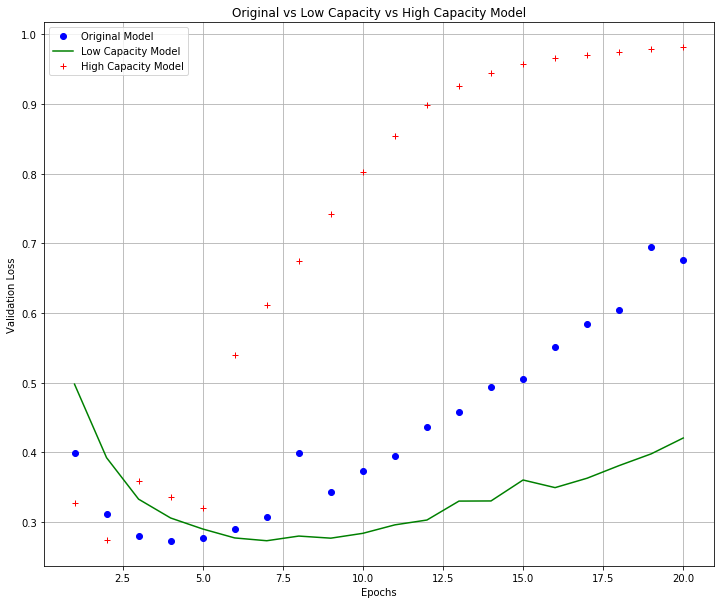

In [14]:
plt.figure(figsize=(12,10))
plt.plot(epochs, original_val_loss_values, 'bo', label='Original Model')
plt.plot(epochs, low_cap_val_loss_values, 'b', label='Low Capacity Model', color='green')
plt.plot(epochs, high_cap_val_loss_values, '+', label='High Capacity Model', color='red')
plt.title('Original vs Low Capacity vs High Capacity Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [22]:
#L2 Regularization
from keras import regularizers

l2_model= models.Sequential()
l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(10000,)))
l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l2_history=l2_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.5739 - acc: 0.7353 - val_loss: 0.4550 - val_acc: 0.8532
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.3646 - acc: 0.8977 - val_loss: 0.3423 - val_acc: 0.8826
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2679 - acc: 0.9210 - val_loss: 0.3085 - val_acc: 0.8844
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2125 - acc: 0.9374 - val_loss: 0.3161 - val_acc: 0.8778
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1795 - acc: 0.9482 - val_loss: 0.2906 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1525 - acc: 0.9576 - val_loss: 0.3261 - val_acc: 0.8765
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1368 - acc: 0.9626 - val_loss: 0.3050 - 

In [23]:
l2_history_dict= l2_history.history
l2_loss_values= l2_history_dict['loss']
l2_val_loss_values= l2_history_dict['val_loss']

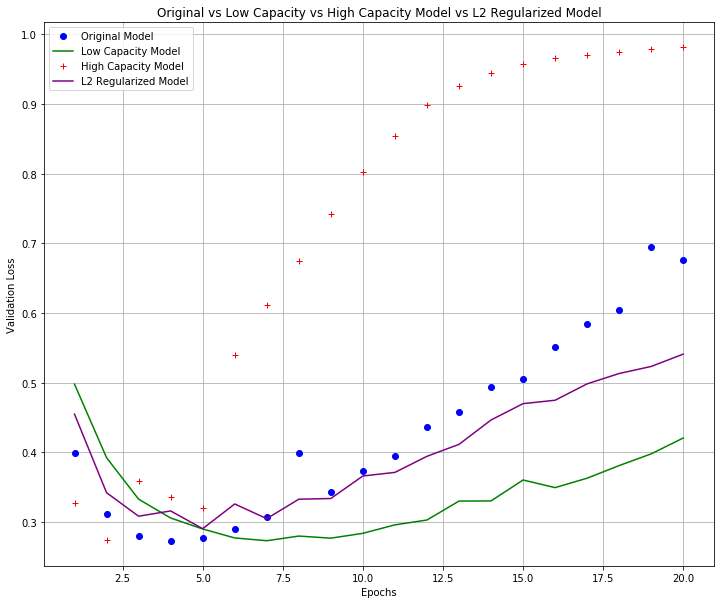

In [24]:
plt.figure(figsize=(12,10))
plt.plot(epochs, original_val_loss_values, 'bo', label='Original Model')
plt.plot(epochs, low_cap_val_loss_values, 'b', label='Low Capacity Model', color='green')
plt.plot(epochs, high_cap_val_loss_values, '+', label='High Capacity Model', color='red')
plt.plot(epochs, l2_val_loss_values, '-', label='L2 Regularized Model', color='purple')
plt.title('Original vs Low Capacity vs High Capacity Model vs L2 Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### Adding Dropout

**Dropout** is one of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly *dropping out (setting to zero)* a number of output features of the layer during training. Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The *dropout rate is the fraction of the features that are zeroed out*; it’s usually set between **0.2** and **0.5**. *At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time*.

Consider a Numpy matrix containing the output of a layer, ```layer_output```, of shape ```(batch_size, features)```. At training time, we zero out at random a fraction of the values in the matrix:<br/>
```layer_output *= np.random.randint(0, high=2, size=layer_output.shape)```


In [61]:
layer_output=np.ones(shape=(10,5))
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) #At training time, drops out 50% of the units in the output
layer_output

array([[0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

At test time, we scale down the output by the dropout rate. Here, we scale by 0.5 (because we previously dropped half the units):

In [62]:
layer_output=np.ones(shape=(10,5))
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)#At training time
layer_output /= 0.5 #At test time
layer_output

array([[2., 0., 2., 0., 2.],
       [2., 0., 2., 2., 2.],
       [2., 2., 2., 0., 2.],
       [0., 0., 2., 2., 0.],
       [2., 0., 0., 0., 0.],
       [2., 0., 2., 0., 0.],
       [2., 2., 2., 0., 2.],
       [0., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2.],
       [0., 0., 2., 0., 0.]])

Note that this process can be implemented by doing both operations at training time and leaving the output unchanged at test time, which is often the way it’s implemented
in practice

![capture](https://user-images.githubusercontent.com/13174586/49644108-82d8de80-fa3d-11e8-95ac-366834ccdcc0.JPG)

>This technique may seem strange and arbitrary. Why would this help reduce overfitting? 
Hinton says he was inspired by, among other things, a fraud-prevention mechanism used by banks. In his own words, “I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.”

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren’t significant (what Hinton refers to as *conspiracies*), which the network will start memorizing if no noise is present.
In Keras, you can introduce dropout in a network via the Dropout layer, which is applied to the output of the layer right before it:<br/> 
```model.add(layers.Dropout(0.5))```

![capture](https://user-images.githubusercontent.com/13174586/49644965-36db6900-fa40-11e8-8cfa-11b3cd845e39.JPG)
This is a clear improvement over the reference network.

#### Code

In [65]:
#Adding dropout layer

dropout_model= models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
dropout_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
dropout_history= dropout_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [70]:
dropout_history_dict= dropout_history.history
dropout_val_loss_values= dropout_history_dict['val_loss']

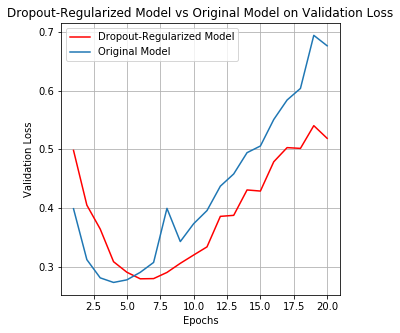

In [80]:
plt.figure(figsize=(5,5))
plt.plot(epochs, dropout_val_loss_values, color='red', label="Dropout-Regularized Model")
plt.plot(epochs, original_val_loss_values, label="Original Model")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Dropout-Regularized Model vs Original Model on Validation Loss')
plt.legend()
plt.grid()
plt.show()

The most common ways to prevent overfitting in neural networks:
 - Get more training data.
 - Reduce the capacity of the network.
 - Add weight regularization.
 - Add dropout.

### Universal Workflow of Machine Learning
Blueprint:
 - Problem Definition
 - Evaluation
 - Feature engineering,
 - Fighting overfitting.

#### Define The problem and Assemble a Dataset
- *What will our input data be? What are we trying to predict?* We can only learn to predict something if we have available training data: for example, we can only learn to classify the sentiment of movie reviews if we have both movie reviews and sentiment annotations available. As such, data availability is usually the limiting factor at this stage.

- *What type of problem are we facing? Is it binary classification? Multiclass classification? Scalar regression? Vector regression? Multiclass, multilabel classification? Something else, like clustering, generation, or reinforcement learning?* Identifying the problem type will guide our choice of model architecture, loss function, and so on.

We can’t move to the next stage until we know what our inputs and outputs are, and what data we’ll use. Be aware of the hypotheses we are making at this stage:
 - We hypothesize that our outputs can be predicted given our inputs.
 - We hypothesize that our available data is sufficiently informative to learn the relationship between inputs and outputs.

Until we have a working model, these are merely hypotheses, waiting to be validated or invalidated. Not all problems can be solved; just because you’ve assembled examples of inputs X and targets Y doesn’t mean X contains enough information to predict
Y.

One class of unsolvable problems we should be aware of is *nonstationary problems*. Suppose we’re trying to build a  recommendation engine for clothing, we’re training it on one month of data (August), and we want to start generating recommendations in the winter. One big issue is that the kinds of clothes people buy change from season to season: clothes buying is a nonstationary phenomenon over the scale of a few months. What we’re trying to model changes over time. In this case, the right move is to constantly retrain our model on data from the recent past, or gather data at a timescale where the problem is stationary. For a cyclical problem like clothes buying, a few years’ worth of data will suffice to capture seasonal variation— but we have to remember to *make the time of the year an input of our model!*

#### Choose a Measure of Success
For *balanced-classification problems*, where every class is equally likely, ***accuracy*** and ***area under the receiver operating characteristic curve (ROC AUC)*** are common metrics. For *class-imbalanced problems*, we can use ***precision and recall***. For *ranking problems* or *multilabel classification*, we can use ***mean average precision***.

#### Decide on an Evaluation Protocol
Once we know what we’re aiming for, we must establish how we’ll measure our current progress:
 - **Maintaining a hold-out validation set—** The way to go when we have plenty of data
 - **Doing K-fold cross-validation—** The right choice when we have too few samples for hold-out validation to be reliable
 - **Doing iterated K-fold validation—** For performing highly accurate model evaluation when little data is available
 
#### Prepare Data
Once we know what we’re training on, what we’re optimizing for, and how to evaluate our approach, we’re almost ready to begin training models. But first, we should format our data in a way that can be fed into a *deep neural network*:
- Our data should be formatted as tensors.
- The values taken by these tensors should usually be scaled to small values: for example, in the [-1, 1] range or [0, 1] range.
- If different features take values in different ranges (heterogeneous data), then the data should be normalized.
- We may want to do some feature engineering, especially for small-data problems.

Once our tensors of input data and target data are ready, we can begin to train models.

#### Develope a Model That Does Better Than a Baseline
Our goal at this stage is to achieve *statistical power* : that is, to develop a small model that is capable of beating a dumb baseline. It’s not always possible to achieve statistical power. If we can’t beat a random baseline after trying multiple reasonable architectures, it may be that the answer to the question we’re asking isn’t present in the input data. Remember that we make two hypotheses:
 - We hypothesize that our outputs can be predicted given our inputs.
 - we hypothesize that the available data is sufficiently informative to learn the relationship between inputs and outputs.
 
Three key choices to build our first working model:
 - **Last-layer activation—** This establishes useful constraints on the network’s output. For instance, the IMDB classification example used sigmoid in the last layer; the regression example didn’t use any last-layer activation.
 - **Loss function—** This should match the type of problem we’re trying to solve. For instance, the IMDB example used *binary_crossentropy*, the regression example used *mse*.
 - **Optimization configuration—** What optimizer will we use? What will its learning rate be? In most cases, it’s safe to go with *rmsprop* and its default learning rate.
 
Regarding the choice of a loss function, it isn’t always possible to directly optimize for the metric that measures success on a problem. Sometimes there is no easy way to turn a metric into a loss function; loss functions, after all, need to be computable
given only a mini-batch of data (ideally, a loss function should be computable for as little as a single data point) and must be differentiable (otherwise, we can’t use backpropagation to train our network). For instance, the widely used classification
metric ROC AUC can’t be directly optimized. Hence, in classification tasks, it’s common to optimize for a proxy metric of ROC AUC, such as crossentropy. In general, we can hope that the lower the crossentropy gets, the higher the ROC AUC will be.

Table for last-layer activation and a loss function for a few common problem types

| Problem Type | Last Layer Activation | Loss Function |
| --- | --- | --- |
| *Binary Classification* | *sigmoid* | *binary_crossentropy* |
| *Multiclass, single label Classification* | *softmax* | *categorical_crossentropy* |
| *Multiclass, multilabel Classification* | *sigmoid* | *binary_crossentropy* |
| *Regression to arbitrary values* | None | *mse* |
| *Regression to values between 0 and 1* | *sigmoid* | *mse* or *binary_crossentropy* |


#### Scaling up: Develope a Model That Overfits
Once we’ve obtained a model that has statistical power, the question becomes, is our model sufficiently powerful? Does it have enough layers and parameters to properly model the problem at hand? For instance, a network with a single hidden layer with
two units would have statistical power on MNIST but wouldn’t be sufficient to solve the problem well. The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border
between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first we must cross it.<br/>
To figure out how big a model we’ll need, we must develop a model that overfits by:<br/>
 - Add layers
 - Making the layers bigger
 - Train for more epochs
 
Always monitor the training loss and validation loss, as well as the training and validation values for any important metrics. When we will see that the model’s performance on the validation data begins to degrade, we’ve achieved overfitting. The next stage is to start regularizing and tuning the model, to get as close as possible to the ideal model that neither underfits nor overfits.

#### Regularize Model and Tune Hyperparameters
This step will take the most time: we’ll repeatedly modify our model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. These are some things we should try:
 - Add dropout
 - Try different architectures: add or remove layers
 - Add L1 and/or L2 regularization
 - Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration
 - Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.

Every time we use feedback from our validation process to tune our model, we leak information about the validation process into the model. Repeated just a few times, this is innocuous; but done systematically over many iterations, it will eventually cause our model to overfit to the validation process (even though no model is directly trained on any of the validation data). This makes the evaluation process less reliable.<br/>
Once we’ve developed a satisfactory model configuration, we can train our final production model on all the available data (training and validation) and evaluate it one last time on the test set. If it turns out that performance on the test set is significantly worse than the performance measured on the validation data, this may mean either that our validation procedure wasn’t reliable after all, or that we began overfitting to the validation data while tuning the parameters of the model. In this case, we may want to switch to a more reliable evaluation protocol (such as iterated K-fold validation).